# 第1章 统计学习方法概率

1．统计学习是关于计算机基于数据构建概率统计模型并运用模型对数据进行分析与预测的一门学科。统计学习包括监督学习、非监督学习、半监督学习和强化学习。

2．统计学习方法三要素——模型、策略、算法，对理解统计学习方法起到提纲挈领的作用。

3．本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。

4．统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题。

5．分类问题、标注问题和回归问题都是监督学习的重要问题。本书中介绍的统计学习方法包括感知机、$K$近邻法、朴素贝叶斯法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、EM算法、隐马尔科夫模型和条件随机场。这些方法是主要的分类、标注以及回归方法。它们也可以归类为生成方法与判别方法。

### 使用最小二乘法拟合曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

* ps: numpy.poly1d([1, 2, 3]) 生成 $1x^2+2x^1+3x^0$

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M 为多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    print(f'p_init:{p_init}')
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

### M=0

p_init:[0.43834337]
Fitting Parameters: [-0.04096524]


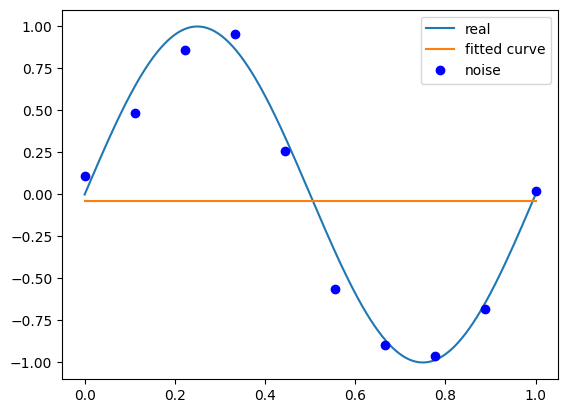

In [4]:
p_lsq_0 = fitting(M=0)

### M=1

p_init:[0.37882265 0.6042603 ]
Fitting Parameters: [-1.3355563   0.62681291]


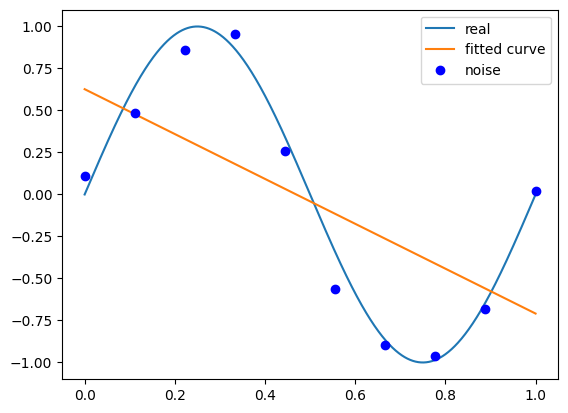

In [5]:
p_lsq_1 = fitting(M=1)

### M=3

p_init:[0.26653932 0.04417334 0.92398593 0.57841252]
Fitting Parameters: [ 2.03047677e+01 -2.99838866e+01  9.74734901e+00 -4.96694114e-03]


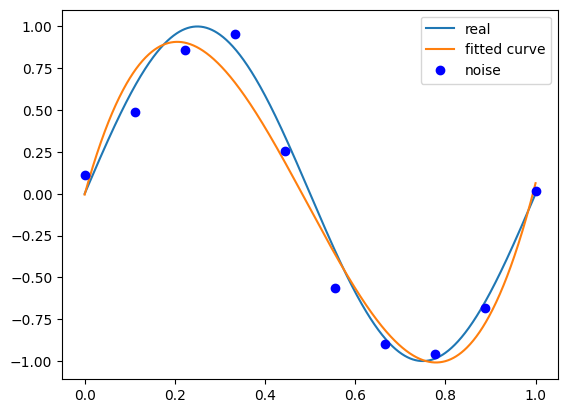

In [6]:
p_lsq_3 = fitting(M=3)

### M=9

p_init:[0.6712707  0.95931074 0.16007874 0.99489913 0.02124564 0.44299072
 0.38956533 0.40622363 0.2155225  0.28421915]
Fitting Parameters: [-2.47177516e+03  7.65621201e+03 -6.56263859e+03 -2.89429046e+03
  8.47920892e+03 -5.67791616e+03  1.68269048e+03 -2.25831064e+02
  1.42466877e+01  1.12177526e-01]


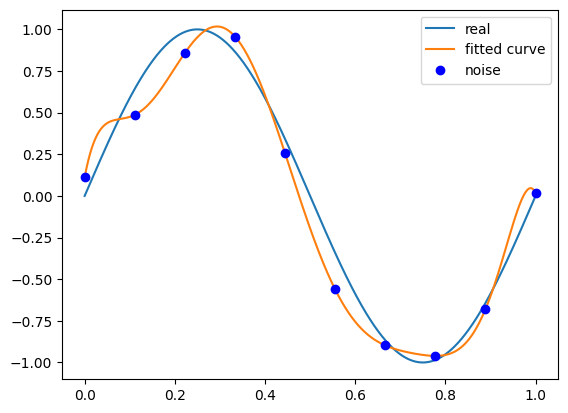

In [7]:
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

结果显示过拟合，引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数，也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [8]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p))) # L2范数作为正则化项
    return ret

In [9]:
# 最小二乘法，加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

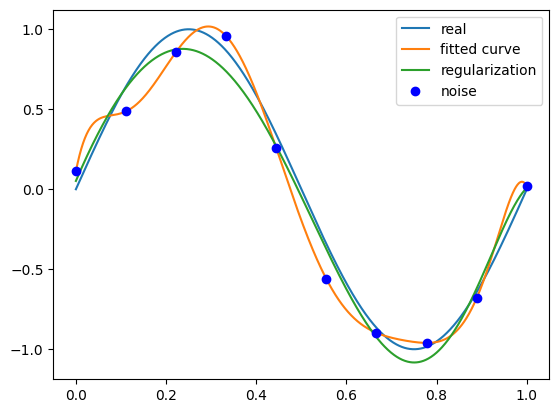

In [10]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

## 习题

### 习题1.1
&emsp;&emsp;说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素。伯努利模型是定义在取值为0与1的随机变量上的概率分布。假设观测到伯努利模型$n$次独立的数据生成结果，其中$k$次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率。

### 习题1.2
&emsp;&emsp;通过经验风险最小化推导极大似然估计。证明模型是条件概率分布，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计。

### 补充
$N(0, 0.1)$的图像。np.random.normal(0, 0.1)的值有正也会有负。

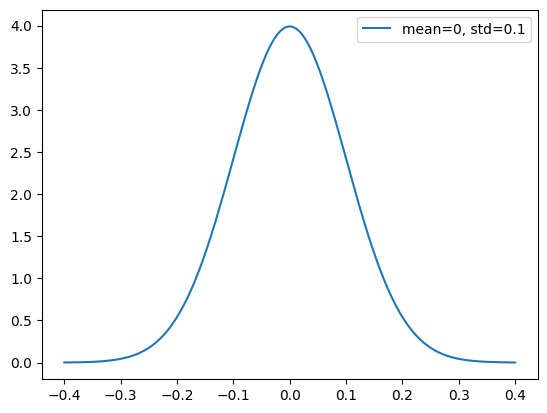

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 定义正态分布的参数
mu = 0  # 均值
sigma = 0.1  # 标准差

# 生成一系列数据点
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# 计算正态分布的概率密度函数
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 绘制图像
plt.plot(x, y, label='mean=0, std=0.1')

# 添加图例
plt.legend()

# 显示图像
plt.show()